![](https://www.dii.uchile.cl/wp-content/uploads/2021/06/Magi%CC%81ster-en-Ciencia-de-Datos.png)


# Proyecto: Riesgo en el Banco Giturra

**MDS7202: Laboratorio de Programación Científica para Ciencia de Datos**

### Cuerpo Docente:

- Profesor: Gabriel Iturra, Ignacio Meza De La Jara
- Auxiliar: Sebastián Tinoco
- Ayudante: Arturo Lazcano, Angelo Muñoz

_Por favor, lean detalladamente las instrucciones de la tarea antes de empezar a escribir._

---

## Reglas

- Fecha de entrega: 19/12/2023
- **Grupos de 2 personas.**
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Estrictamente prohibida la copia.
- Pueden usar cualquier material del curso que estimen conveniente.

---

## Alumno

- Alan Contreras Montanares
- Link de repositorio de GitHub: `https://github.com/AlanMontanares/MDS7202`



---


# Presentación del Problema


![](https://www.diarioeldia.cl/u/fotografias/fotosnoticias/2019/11/8/67218.jpg)


**Giturra**, un banquero astuto y ambicioso, estableció su propio banco con el objetivo de obtener enormes ganancias. Sin embargo, su reputación se vio empañada debido a las tasas de interés usureras que imponía a sus clientes. A medida que su banco crecía, Giturra enfrentaba una creciente cantidad de préstamos impagados, lo que amenazaba su negocio y su prestigio.

Para abordar este desafío, Giturra reconoció la necesidad de reducir los riesgos de préstamo y mejorar la calidad de los préstamos otorgados. Decidió aprovechar la ciencia de datos y el análisis de riesgo crediticio. Contrató a un equipo de expertos para desarrollar un modelo predictivo de riesgo crediticio.

Cabe señalar que lo modelos solicitados por el banquero deben ser interpretables. Ya que estos le permitira al equipo comprender y explicar cómo se toman las decisiones crediticias. Utilizando visualizaciones claras y explicaciones detalladas, pudieron identificar las características más relevantes, le permitirá analizar la distribución de la importancia de las variables y evaluar si los modelos son coherentes con el negocio.

Para esto Giturra les solicita crear un modelo de riesgo disponibilizandoles una amplia gama de variables de sus usuarios: como historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


## Instalación de Librerías y Carga de Datos.


Para el desarrollo de su proyecto, utilice el conjunto de datos `dataset.pq` para entrenar un modelo de su elección. Se le recomienda levantar un ambiente de `conda` para instalar las librerías y así evitar cualquier problema con las versiones.


---

## Secciones Requeridas en el Informe

La siguiente lista detalla las secciones que debe contener su notebook para resolver el proyecto. 
Es importante que al momento de desarrollar cada una de las secciones, estas sean escritas en un formato tipo **informe**, donde describan detalladamente cada uno de los puntos realizados.

### 1. Introducción [0.5 puntos]




En este proyecto, se presentarán los resultados obtenidos de implementar clasificadores de riesgo crediticio mediante modelos de Machine Learning. La entrada de estos modelos son caracteristicas de personas registradas por el banco de Giturra, dueño del banco y del problema. Dentro de las caracteristicas se encuentran; historiales de crédito, ingresos y otros factores financieros relevantes, para evaluar la probabilidad de incumplimiento de pago de los clientes. Con esta información, Giturra podra tomar decisiones más informadas en cuanto a los préstamos, ofreciendo condiciones más favorables a aquellos con menor riesgo de impago.


Para evaluar la performance de los modelos se utilizará el Macro-Recall, debido a que las clases dentro del dataset presenta un gran desbalance, por lo que utilizar otras metricas como Accuracy, Precision o F1-Score podria traer sesgos de analisis, ya que dependen de este balance, aspecto que no afecta el Macro-Recall.

En este caso, dado los buenos resultados que existen en modelos que utilizan arboles de desicion con features tabulares, se trató de ver si en este problema tambien ocurria, en donde se dio cuenta que si. Dentro de los modelos destacados se encuentran; Randon Forest, LightGBM, XGBoost y Balanced Random Forest. Este ultimo se escogio como el mejor de todos, ya que solucionaba el problema del desbalance entre clases, obteniendo los mejores resultados.

Asi tambien, dada la calidad de los datos, se tuvo que preprocesarlos, en donde se opto por utilizar MinMaxScaler() en datos numericos flotantes, OrdinalEncoder() en un dato ordinal y OneHotEncoder() en datos categoricos. Por otro lado, dada la gran cantidad de valores nulos, se optó por utilizar KNNImputer(), de esta forma se evita eliminar estos datos problematicos, lo cual traeria más problema al desbalance entre clases y riesgo de eliminar datos representativos.

Finalmente, se obtuvo una metrica de Macro-Recall cercano al 75% al utilizar Balanced Random Forest, en donde el Recall en cada clase fue bastante similar, por lo que no hay sesgos de clases en la clasificacion al usar este modelo, lo cual es un aspecto muy importante en cuanto a la performance general del modelo. Aun asi, faltaria seguir iterando en la calidad de pre-procesamiento de los datos para seguir mejorando las metricas, por sobre utilizar otros modelos u optimizacion de hiperparametros.


### 2. Carga de datos Análisis Exploratorio de Datos [Sin puntaje]

In [1]:
#-----------LIBRERIAS---------------#
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder,OrdinalEncoder,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.svm import SVC

import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, recall_score
from optuna import Trial
from optuna.samplers import TPESampler
from sklearn.base import clone


from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt


from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_parquet("dataset.pq")
df

customer_id   age     occupation  annual_income  monthly_inhand_salary  \
0       CUS_0xd40  23.0      Scientist       19114.12            1824.843333   
1      CUS_0x21b1  28.0        Teacher       34847.84            3037.986667   
2      CUS_0x2dbc  34.0       Engineer      143162.64           12187.220000   
3      CUS_0xb891  55.0   Entrepreneur       30689.89            2612.490833   
4      CUS_0x1cdb  21.0      Developer       35547.71            2853.309167   
...           ...   ...            ...            ...                    ...   
12495  CUS_0x372c  19.0         Lawyer       42903.79            3468.315833   
12496   CUS_0xf16  45.0  Media_Manager       16680.35                    NaN   
12497  CUS_0xaf61  50.0         Writer       37188.10            3097.008333   
12498  CUS_0x8600  29.0      Architect       20002.88            1929.906667   
12499  CUS_0x942c  25.0       Mechanic       39628.99            3359.415833   

       num_bank_accounts  num_credit_card  interest_rate  num_of_loan  \
0                      3                4              3          4.0   
1                      2                4              6          1.0   
2                      1                5              8          3.0   
3                      2                5              4       -100.0   
4                      7                5              5       -100.0   
...                  ...              ...            ...          ...   
12495                  0                4              6          1.0   
12496                  1                1              5          4.0   
12497                  1                4              5          3.0   
12498                 10                8             29          5.0   
12499                  4                6              7          2.0   

       delay_from_due_date  ...  num_credit_inquiries  outstanding_debt  \
0                        3  ...                   4.0            809.98   
1                        3  ...                   2.0            605.03   
2                        8  ...                   3.0           1303.01   
3                        4  ...                   4.0            632.46   
4                        1  ...                   4.0            943.86   
...                    ...  ...                   ...               ...   
12495                    9  ...                   1.0           1079.48   
12496                    1  ...                   8.0            897.16   
12497                    7  ...                   3.0            620.64   
12498                   33  ...                   9.0           3571.70   
12499                   18  ...                   3.0            502.38   

       credit_utilization_ratio  credit_history_age  payment_of_min_amount  \
0                     23.933795                 NaN                     No   
1                     32.933856                27.0                     No   
2                     38.374753                18.0                     No   
3                     27.332515                17.0                     No   
4                     25.862922                31.0                    Yes   
...                         ...                 ...                    ...   
12495                 35.716618                28.0                     No   
12496                 41.212367                 NaN                     No   
12497                 39.300980                30.0                     No   
12498                 37.140784                 6.0                    Yes   
12499                 34.192463                31.0                     No   

       total_emi_per_month amount_invested_monthly  \
0                49.574949               24.785217   
1                18.816215              218.904344   
2               246.992319            10000.000000   
3                16.415452              125.617251   
4                 0.000000              181.330901   
...   

### 3. Preparación de Datos [0.5 puntos]


#### 3.1 Preprocesamiento con `ColumnTransformer`


Antes del pre-procesamiento geneta, vemos datos que pueden presentar anomalias, como por ejemplo; años negativos, numero de cuentas negativos, dineros negativos,categorias no entendibles. Asi tambien, de antemano se elimina la columna `customer_id` debido a que no aporta en la resolucion del problema, agregando de que si se quiere usar el modelo en un futuro quizas no se podria tener el id de la persona.

In [3]:
for i in ["age","num_bank_accounts","num_of_loan"]:
    df.loc[df[i]<0,i]=np.nan

df['payment_behaviour']= df['payment_behaviour'].replace("!@9#%8",np.nan)

df = df.drop("customer_id", axis=1)

Procesamos cada columna. Ahora bien, en este caso se podria usar LabelEncoder u OrdinalEncoder para todas las columnas categoricas debido a que se usarán modelos basados en arboles de decision, por lo que utilizar OneHotEncoder podria traer problemas al dejar un dataframe mas sparse, sin embargo se dejo de esta forma porque igualmente esta correcto y no hay tantas categorias dentro de las columnas categoricas.

In [4]:
categorias = ["occupation","payment_of_min_amount"]
ordinales = ["payment_behaviour"]
flotantes = ["annual_income","monthly_inhand_salary","num_of_loan","changed_credit_limit","outstanding_debt","credit_utilization_ratio","total_emi_per_month","amount_invested_monthly","monthly_balance",]
clases_numericas = ["age","num_bank_accounts","num_credit_card","interest_rate","delay_from_due_date","num_of_delayed_payment","num_credit_inquiries","credit_history_age","credit_score"]


preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), flotantes),
        ('cat', OneHotEncoder(sparse_output=False), categorias),
        ('ord', OrdinalEncoder(), ordinales)
    ],
    remainder= 'passthrough'
)

preprocessor.set_output(transform="pandas")

df_preprocess = preprocessor.fit_transform(df)

nuevas_columnas = flotantes+ list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorias)) + ordinales + clases_numericas

df_preprocess.columns = nuevas_columnas
df_preprocess

annual_income  monthly_inhand_salary  num_of_loan  \
0           0.000508               0.102087     0.002676   
1           0.001168               0.183501     0.000669   
2           0.005714               0.797502     0.002007   
3           0.000994               0.154946          NaN   
4           0.001198               0.171107          NaN   
...              ...                    ...          ...   
12495       0.001507               0.212380     0.000669   
12496       0.000406                    NaN     0.002676   
12497       0.001267               0.187462     0.002007   
12498       0.000545               0.109138     0.003344   
12499       0.001369               0.205072     0.001338   

       changed_credit_limit  outstanding_debt  credit_utilization_ratio  \
0                  0.408652          0.162020                  0.136411   
1                  0.274045          0.121012                  0.456709   
2                  0.312701          0.260669                  0.650342   
3                  0.195122          0.126501                  0.257366   
4                  0.208698          0.188808                  0.205066   
...                     ...               ...                       ...   
12495              0.266682          0.215943                  0.555743   
12496              0.280258          0.179464                  0.751328   
12497              0.273125          0.124136                  0.683305   
12498              0.570640          0.714603                  0.606427   
12499              0.413944          0.100473                  0.501501   

       total_emi_per_month  amount_invested_monthly  monthly_balance  \
0                 0.000605                 0.002479              1.0   
1                 0.000230                 0.021890              1.0   
2                 0.003013                 1.000000              1.0   
3                 0.000200                 0.012562              1.0   
4                 0.000000                 0.018133              1.0   
...                    ...                      ...              ...   
12495             0.000427                 0.011518              NaN   
12496             0.000502                 0.007081              NaN   
12497             0.001027                 0.004294              NaN   
12498             0.000744                 0.003466              NaN   
12499             0.000428                 0.016716              NaN   

       occupation_Accountant  ...  payment_behaviour   age  num_bank_accounts  \
0                        0.0  ...                1.0  23.0                3.0   
1                        0.0  ...                5.0  28.0                2.0   
2                        0.0  ...                2.0  34.0                1.0   
3                        0.0  ...                2.0  55.0                2.0   
4                        0.0  ...                2.0  21.0                7.0   
...                      ...  ...                ...   ...                ...   
12495                    0.0  ...                1.0  19.0                0.0   
12496                    0.0  ...                3.0  45.0                1.0   
12497                    0.0  ...                1.0  50.0                1.0   
12498                    0.0  ...                0.0  29.0               10.0   
12499                    0.0  ...                NaN  25.0                4.0   

       num_credit_card  interest_rate  delay_from_due_date  \
0                    4              3                    3   
1                    4              6                    3   
2                    5              8                    8   
3                    5              4                    4   
4                    5              5                    1   
...                ...            ...                  ...   
12495                4              6                    9   
12496                1              5              

#### 3.2 Holdout 

Ejecute `train_test_split` para generar un conjunto de entrenamiento, validacióny de prueba. 

In [5]:
X = df.drop('credit_score', axis=1)
y =df['credit_score']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.4,
    random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_test,
    y_test,
    stratify=y_test,
    test_size=0.5,
    random_state=42
)

#### 3.3 Datos nulos.


In [6]:
df_preprocess.isnull().sum()

annual_income                   0
monthly_inhand_salary        1916
num_of_loan                   500
changed_credit_limit          254
outstanding_debt                0
credit_utilization_ratio        0
total_emi_per_month             0
amount_invested_monthly       586
monthly_balance               355
occupation_Accountant           0
occupation_Architect            0
occupation_Developer            0
occupation_Doctor               0
occupation_Engineer             0
occupation_Entrepreneur         0
occupation_Journalist           0
occupation_Lawyer               0
occupation_Manager              0
occupation_Mechanic             0
occupation_Media_Manager        0
occupation_Musician             0
occupation_Scientist            0
occupation_Teacher              0
occupation_Writer               0
occupation________              0
payment_of_min_amount_NM        0
payment_of_min_amount_No        0
payment_of_min_amount_Yes       0
payment_behaviour             998
age           

Se usaron dos metodos; eliminar todos los datos que poseen datos nulos y utilizar un Imputer para rellenar esos datos. La segunda opcion tuvo mejores resultados respecto a la primera, por lo que se optó por utilizar `KNNImputer()`. Ahora bien, otro aspecto por lo que se escogio el uso de un Imputer fue porque existen muchos ejemplos que poseen datos nulos, y al eliminarlo, se reduciria considerablemente el dataset que se tiene, perjudicando aun más el desbalance entre clases. Esto ultimo es lo que menos se quiere, debido a que dentro de los datos que se eliminen se podrian estar datos representativos.

In [7]:
imputer = KNNImputer(n_neighbors=2)  
df_imputado = pd.DataFrame(imputer.fit_transform(df_preprocess), columns=df_preprocess.columns)

df_imputado

annual_income  monthly_inhand_salary  num_of_loan  \
0           0.000508               0.102087     0.002676   
1           0.001168               0.183501     0.000669   
2           0.005714               0.797502     0.002007   
3           0.000994               0.154946     0.002007   
4           0.001198               0.171107     0.000669   
...              ...                    ...          ...   
12495       0.001507               0.212380     0.000669   
12496       0.000406               0.060412     0.002676   
12497       0.001267               0.187462     0.002007   
12498       0.000545               0.109138     0.003344   
12499       0.001369               0.205072     0.001338   

       changed_credit_limit  outstanding_debt  credit_utilization_ratio  \
0                  0.408652          0.162020                  0.136411   
1                  0.274045          0.121012                  0.456709   
2                  0.312701          0.260669                  0.650342   
3                  0.195122          0.126501                  0.257366   
4                  0.208698          0.188808                  0.205066   
...                     ...               ...                       ...   
12495              0.266682          0.215943                  0.555743   
12496              0.280258          0.179464                  0.751328   
12497              0.273125          0.124136                  0.683305   
12498              0.570640          0.714603                  0.606427   
12499              0.413944          0.100473                  0.501501   

       total_emi_per_month  amount_invested_monthly  monthly_balance  \
0                 0.000605                 0.002479              1.0   
1                 0.000230                 0.021890              1.0   
2                 0.003013                 1.000000              1.0   
3                 0.000200                 0.012562              1.0   
4                 0.000000                 0.018133              1.0   
...                    ...                      ...              ...   
12495             0.000427                 0.011518              1.0   
12496             0.000502                 0.007081              1.0   
12497             0.001027                 0.004294              1.0   
12498             0.000744                 0.003466              1.0   
12499             0.000428                 0.016716              1.0   

       occupation_Accountant  ...  payment_behaviour   age  num_bank_accounts  \
0                        0.0  ...                1.0  23.0                3.0   
1                        0.0  ...                5.0  28.0                2.0   
2                        0.0  ...                2.0  34.0                1.0   
3                        0.0  ...                2.0  55.0                2.0   
4                        0.0  ...                2.0  21.0                7.0   
...                      ...  ...                ...   ...                ...   
12495                    0.0  ...                1.0  19.0                0.0   
12496                    0.0  ...                3.0  45.0                1.0   
12497                    0.0  ...                1.0  50.0                1.0   
12498                    0.0  ...                0.0  29.0               10.0   
12499                    0.0  ...                1.5  25.0                4.0   

       num_credit_card  interest_rate  delay_from_due_date  \
0                  4.0            3.0                  3.0   
1                  4.0            6.0                  3.0   
2                  5.0            8.0                  8.0   
3                  5.0            4.0                  4.0   
4                  5.0            5.0                  1.0   
...                ...            ...                  ...   
12495              4.0            6.0                  9.0   
12496              1.0            5.0              

In [8]:
df_sin_nan = df_preprocess.dropna()
df_sin_nan

annual_income  monthly_inhand_salary  num_of_loan  \
1           0.001168               0.183501     0.000669   
2           0.005714               0.797502     0.002007   
6           0.005217               0.682207     0.001338   
7           0.001136               0.154853     0.002007   
8           0.004526               0.640241     0.002007   
...              ...                    ...          ...   
12282       0.007074               0.947480     0.002007   
12283       0.004743               0.667012     0.002676   
12284       0.002219               0.322625     0.002676   
12286       0.001158               0.177081     0.000000   
12287       0.001427               0.191217     0.000669   

       changed_credit_limit  outstanding_debt  credit_utilization_ratio  \
1                  0.274045          0.121012                  0.456709   
2                  0.312701          0.260669                  0.650342   
6                  0.364243          0.070416                  0.323397   
7                  0.543488          0.340937                  0.488369   
8                  0.338932          0.275621                  0.274478   
...                     ...               ...                       ...   
12282              0.289462          0.077786                  0.825842   
12283              0.304648          0.089295                  0.595708   
12284              0.289462          0.083534                  0.167376   
12286              0.228716          0.188553                  0.463640   
12287              0.185688          0.119886                  0.400565   

       total_emi_per_month  amount_invested_monthly  monthly_balance  \
1                 0.000230                 0.021890              1.0   
2                 0.003013                 1.000000              1.0   
6                 0.011116                 0.087052              1.0   
7                 0.000860                 0.002933              1.0   
8                 0.002768                 0.025457              1.0   
...                    ...                      ...              ...   
12282             0.003539                 0.009786              1.0   
12283             0.002812                 0.019763              1.0   
12284             0.001276                 1.000000              1.0   
12286             0.000000                 0.016540              1.0   
12287             0.000313                 1.000000              1.0   

       occupation_Accountant  ...  payment_behaviour   age  num_bank_accounts  \
1                        0.0  ...                5.0  28.0                2.0   
2                        0.0  ...                2.0  34.0                1.0   
6                        0.0  ...                4.0  34.0                0.0   
7                        0.0  ...                1.0  30.0                8.0   
8                        0.0  ...                0.0  24.0                2.0   
...                      ...  ...                ...   ...                ...   
12282                    0.0  ...                0.0  32.0                5.0   
12283                    0.0  ...                0.0  40.0                5.0   
12284                    0.0  ...                5.0  24.0                4.0   
12286                    0.0  ...                2.0  29.0                7.0   
12287                    0.0  ...                5.0  38.0                0.0   

       num_credit_card  interest_rate  delay_from_due_date  \
1                    4              6                    3   
2                    5              8                    8   
6                    1              8                    0   
7                    7             15                   30   
8                    5              7                   11   
...                ...            ...                  ...   
12282                4              1                   10   
12283                1              7              

#### 3.4 Feature Engineering [Bonus - 0.5 puntos]

Usaremos la informacion mutua para ver que tan informativas son las caracteristicas. A diferencia de la correlacion, la informacion mutua puede capturar patrones (no necesariamente lineales) que existan entre dos variables aleatorias, lo cual la correlacion no puede capturar. Por ejemplo, si una variable aleatoria mapea a otra como una funcion cuadratica, esto seria altamente informativo y seguramente serviria para el analisis, pero la correlacion entre estas seria baja y se terminaria descartando.


In [9]:
X_knn = df_imputado.drop('credit_score', axis=1)
y_knn =df_imputado['credit_score']

In [10]:
y_knn.value_counts()

credit_score
0.0    8898
1.0    3602
Name: count, dtype: int64

In [11]:
p0 = 8898/(3602+8898)
p1 = 3602/(3602+8898)

print(f"Entropia Credit Score: {-(p0*np.log2(p0) + p1*np.log2(p1))}")

Entropia Credit Score: 0.8663325207014072


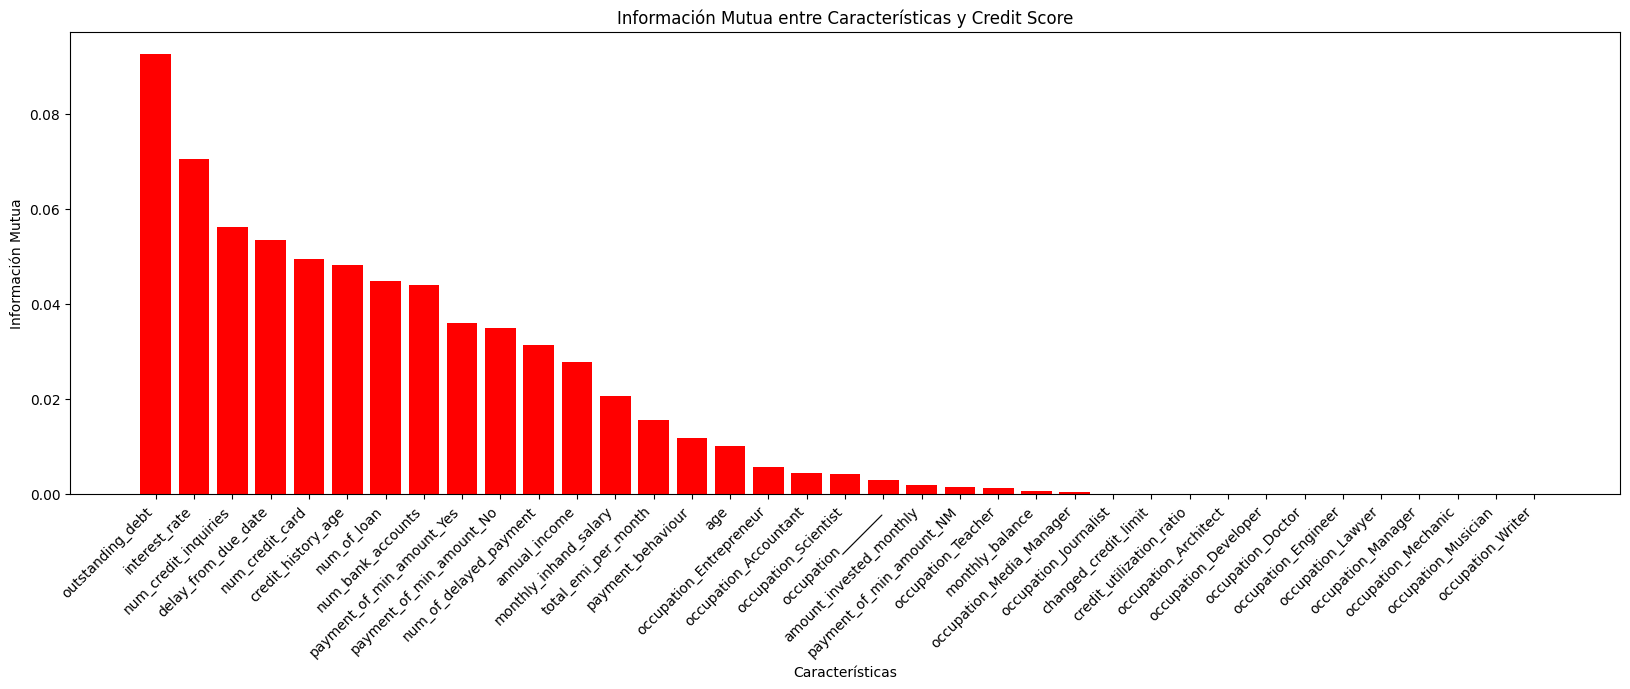

In [12]:
mutual_info_scores = mutual_info_classif(X_knn, y_knn)

sorted_features, sorted_scores = zip(*sorted(zip(X_knn.columns, mutual_info_scores), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(20, 6))
plt.bar(sorted_features, sorted_scores, color='red')
plt.title('Información Mutua entre Características y Credit Score')
plt.xlabel('Características')
plt.ylabel('Información Mutua')
plt.xticks(rotation=45, ha='right')
plt.show()

Podemos ver que hay features significativamente más informativas que otras, las más informativas son: `outstanding_debt`,`interest_rate`,`delay_form_due_date`. Esto en parte tiene sentido, ya que son caracteristicas que se relacionan con deudas de las personas, como cantidades, tiempos sin pagar, etc. Lo cual en parte tiene cierta causalidad con el target que se quiere predecir.

### 4. Baseline [1.5 puntos]

Respecto al desbalance entre las clases, lo que se va a hacer es agregar el modelo Balanced Random Forest. Esto se hace debido a que este modelo realiza el balance de datos de forma interna (mediante algun metodo dado), agregando que como se estan utilizando caracteristicas tabulares, los algoritmos que usan arboles de desicion funcionan bien con ellas. 

In [27]:
pipeline_dummy = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', DummyClassifier(strategy='stratified', random_state=42))
])

pipeline_logistic = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', LogisticRegression(random_state=42))
])

pipeline_kn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', KNeighborsClassifier())
])

pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', SVC(random_state=42))
])

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', RandomForestClassifier(random_state=42))
])

pipeline_lgbmc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', LGBMClassifier(random_state=42))
])


pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', XGBClassifier(random_state=42))
])

pipeline_brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2)),
    ('classifier', BalancedRandomForestClassifier(random_state=42))
])

macro_recall_dict =  {}

for name, pipeline in zip(['Dummy Classifier', 'Logistic Regression', 'KNeighbors Classifier',
                           'Decision Tree Classifier', 'SVM', 'Random Forest Classifier',
                           'LightGBM Classifier', 'XGBoost Classifier', 'Balanced Random Forest'],
                          [pipeline_dummy, pipeline_logistic, pipeline_kn, pipeline_tree,
                           pipeline_svm, pipeline_rf, pipeline_lgbmc, pipeline_xgb,pipeline_brf]):
    print(f"\n{name}:")
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    macro_recall_dict[name] = recall_score(y_test, y_pred, average="macro",zero_division=True)
    print(classification_report(y_test, y_pred, zero_division=True))


Dummy Classifier:
              precision    recall  f1-score   support

           0       0.70      0.71      0.70      1780
           1       0.26      0.26      0.26       720

    accuracy                           0.58      2500
   macro avg       0.48      0.48      0.48      2500
weighted avg       0.58      0.58      0.58      2500


Logistic Regression:


c:\Users\Legers\MDS7202\env_lab\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       0.77      0.90      0.83      1780
           1       0.58      0.34      0.43       720

    accuracy                           0.74      2500
   macro avg       0.68      0.62      0.63      2500
weighted avg       0.72      0.74      0.72      2500


KNeighbors Classifier:
              precision    recall  f1-score   support

           0       0.78      0.86      0.82      1780
           1       0.54      0.41      0.46       720

    accuracy                           0.73      2500
   macro avg       0.66      0.63      0.64      2500
weighted avg       0.71      0.73      0.72      2500


Decision Tree Classifier:
              precision    recall  f1-score   support

           0       0.78      0.79      0.78      1780
           1       0.46      0.46      0.46       720

    accuracy                           0.69      2500
   macro avg       0.62      0.62      0.62      2500
weighted avg       0.69

c:\Users\Legers\MDS7202\env_lab\Lib\site-packages\imblearn\ensemble\_forest.py:546: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
c:\Users\Legers\MDS7202\env_lab\Lib\site-packages\imblearn\ensemble\_forest.py:558: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


              precision    recall  f1-score   support

           0       0.87      0.77      0.82      1780
           1       0.56      0.71      0.62       720

    accuracy                           0.75      2500
   macro avg       0.71      0.74      0.72      2500
weighted avg       0.78      0.75      0.76      2500



In [32]:
df_recall = pd.DataFrame(list(macro_recall_dict.items()), columns=['Classifier', 'Macro Recall'])
df_recall.sort_values(by='Macro Recall', ascending=False)

Classifier  Macro Recall
8    Balanced Random Forest      0.739576
6       LightGBM Classifier      0.709262
5  Random Forest Classifier      0.701904
7        XGBoost Classifier      0.695311
2     KNeighbors Classifier      0.633958
3  Decision Tree Classifier      0.622144
1       Logistic Regression      0.620552
4                       SVM      0.500414
0          Dummy Classifier      0.483645

Se puede apreciar que todos los clasificadores son mejores que el `Dummy`, aun asi `SVM` tiene un Macro-Recall bastante similar, esto se puede deber particularmente a la normalizacion de los datos, ya que usualmente se utiliza un `StandardScaler()` con `SVM`, lo cual no fue el caso. 

Por otro lado, se puede ver que los mejores modelos son los que utilizan arboles de descicion, pero, el que mejor resultados tiene es `Balanced Random Forest`. La hipotesis que se tiene es que suple el problema del desbalance entre clases, de hecho, se puede ver que en casi todos los modelos, se prioriza la clasificacion de la clase mayoritaria (clase 0), pero clasifica pesimo la clase minoritaria (clase 1), sin embargo, Balanced Random Forest las clasifica de forma similar, en donde se disminuye un poco la clasificacion correcta de la clase 0, pero aumenta considerablemente la de la clase 1.

Respecto a los tiempos de entrenamiento, los datos que se tienen no son una cantidad considerable, por lo que los tiempos de entrenamiento son casi despreciables, dando por efecto que este aspecto no sea tan relevante a la hora de utilizar algun metodo de optimizacion de hiperparametros. Es por eso que seria bueno considerar los mejores modelos (primeros 4) y probar con ellos, agregando de que el entrenamiento de estos modelos basados en arboles de decision toma poco tiempo.

### 5. Optimización del Modelo [1.5 puntos]

In [70]:
def objective_brf(trial):

    params_clf = {
        "criterion": trial.suggest_categorical('criterion', ["gini", "entropy"]),
        "max_features": trial.suggest_categorical('max_features', ["sqrt","log2"]),
        "max_depth": trial.suggest_categorical('max_depth', [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]),
        "class_weight": trial.suggest_categorical('class_weight', [None, "balanced", "balanced_subsample"]),
        "sampling_strategy": trial.suggest_categorical('sampling_strategy', ["majority", "not minority", "not majority", "all", "auto"]),
        "n_estimators": trial.suggest_int('n_estimators',100, 1000),
        "n_jobs": -1,
        "random_state": 42,
        "replacement": True,
    }

    params_knn ={
            "n_neighbors": trial.suggest_categorical('n_neighbors', [1,2,3,4,5,6,7,8,9,10]),
    }
    
    classifier = BalancedRandomForestClassifier(**params_clf)
    imputer= KNNImputer(**params_knn)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('imputer', imputer),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    recall = recall_score(y_val, predictions, average="macro",zero_division=True)
    return recall

In [130]:
def objective_lgbmc(trial):

    params_clf = {
        "objective": "binary",
        "metric": "logloss",
        "boosting_type": "gbdt",
        "num_class": 1,
        "random_state":42,
        "n_jobs": -1,
        "n_estimators": trial.suggest_int('n_estimators',100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 1, log=True),
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "class_weight": trial.suggest_categorical('class_weight', [None, "balanced"])
    }

    params_knn ={
            "n_neighbors": trial.suggest_categorical('n_neighbors', [1,2,3,4,5,6,7,8,9,10]),
    }


    classifier = LGBMClassifier(**params_clf)
    imputer= KNNImputer(**params_knn)

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('imputer', imputer),
        ('classifier', classifier)
    ])

    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_val)
    recall = recall_score(y_val, predictions, average="macro",zero_division=True)
    return recall

In [82]:
study_brf = optuna.create_study(direction='maximize')
study_brf.optimize(objective_brf, n_trials=100)

print('Best hyperparameters:', study_brf.best_params)
print('Best Macro-Recall:', study_brf.best_value)

Best hyperparameters: {'criterion': 'entropy', 'max_features': 'sqrt', 'max_depth': None, 'class_weight': 'balanced_subsample', 'sampling_strategy': 'auto', 'n_estimators': 404, 'n_neighbors': 5}
Best Macro-Recall: 0.7720621770868172


In [9]:
pipeline_brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=5).set_output(transform="pandas")),
    ('classifier', BalancedRandomForestClassifier(random_state=42,
                                                  n_jobs=-1,
                                                  n_estimators= 729,
                                                  criterion= "gini",
                                                  max_features = "sqrt",
                                                  max_depth = None,
                                                  class_weight = None,
                                                  sampling_strategy = "auto",
                                                  replacement=True
                                                    ))
                    ])

pipeline_brf.fit(X_train, y_train)
y_pred = pipeline_brf.predict(X_test)
print(f"Macro Recall Test: {recall_score(y_test, y_pred, average='macro',zero_division=True)}")

Macro Recall Test: 0.7452169163545568


In [131]:
study_lgbmc = optuna.create_study(direction='maximize')
study_lgbmc.optimize(objective_lgbmc, n_trials=100)

print('Best hyperparameters:', study_lgbmc.best_params)
print('Best Macro-Recall:', study_lgbmc.best_value)

[LightGBM] [Warning] feature_fraction is set=0.4283004312133016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4283004312133016
[LightGBM] [Warning] lambda_l1 is set=8.262628393534989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.262628393534989
[LightGBM] [Warning] lambda_l2 is set=0.0003736192815773551, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0003736192815773551
[LightGBM] [Warning] bagging_fraction is set=0.8301791143906576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8301791143906576
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.4283004312133016, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4283004312133016
[LightGBM] [Warning] lambda_l1 is set=8.262628393534989, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.262628393534989
[LightGBM] [Warning] lambda_l2 is s

In [132]:
pipeline_lgbmc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=2).set_output(transform="pandas")),
    ('classifier', LGBMClassifier(random_state=42,
                                n_jobs=-1,
                                n_estimators= 106,
                                learning_rate= 0.024636244818617172,
                                lambda_l1=7.951690035473405e-07,
                                lambda_l2=1.4810446871145403e-06,
                                num_leaves=45,
                                feature_fraction=0.7466414603223079,
                                bagging_fraction=0.7978873882919175,
                                bagging_freq=7,
                                min_child_samples=74,
                                class_weight='balanced',
                                force_col_wise=True
                                  ))
])

pipeline_lgbmc.fit(X_train, y_train)
y_pred = pipeline_lgbmc.predict(X_test)
print(f"Macro Recall Test :{recall_score(y_test, y_pred, average='macro',zero_division=True)}")

[LightGBM] [Warning] feature_fraction is set=0.7466414603223079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7466414603223079
[LightGBM] [Warning] lambda_l1 is set=7.951690035473405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.951690035473405e-07
[LightGBM] [Warning] lambda_l2 is set=1.4810446871145403e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4810446871145403e-06
[LightGBM] [Warning] bagging_fraction is set=0.7978873882919175, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7978873882919175
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7466414603223079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7466414603223079
[LightGBM] [Warning] lambda_l1 is set=7.951690035473405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.951690035473405e-07
[LightGBM] [Warni

#### Bonus

1. **Visualización con Optuna** [0.2 extras]: Veamos algunos graficos importantes para el caso de Balanced Random Forest:


In [83]:
optuna.visualization.plot_param_importances(study_brf)

In [87]:
optuna.visualization.plot_optimization_history(study_brf)


In [85]:
optuna.visualization.plot_slice(study_brf)


Se puede apreciar que los hiperparametros más importantes son la ponderacion de las clases y la profundidad de arboles. Esto es importante saberlo debido a que se podria iterar aun más ampliando el rango de opciones de estos hiperparametros sobre los otros.

Tambien se puede ver que hay cierto limite alrededor del 75% de Macro Recall en todas las combinaciones, por lo que si se quieren mejorar las metricas se tendrian que ver otras opciones aparte de la optimizacion de hiperparametros.

Por ultimo, se puede apreciar las distribuciones o concentraciones de cada hiperpametro en relacion a la funcion objetivo utilizada, esto tambien es util para iterar con más opciones dentro del rango de distribuciones, sin embargo, pueden existir ciertos puntos fuera de este rango que quizas maximizen aun más la funcion objetivo, por lo que hay que tomarlo en cuenta.

Ahora para LightGBM:

In [94]:
optuna.visualization.plot_optimization_history(study_lgbmc)

In [95]:
optuna.visualization.plot_slice(study_lgbmc)

Se puede ver lo mismo que el caso de Balanced Random Forest, de hecho, en este caso la ponderacion de las clases es mucho más importante. Esto igual tiene logica debido a que no se realiza un balance entre ellas (como en Balanced Random Forest) por lo que la ponderacion tomaria más importancia al usar un criterio macro.

Tambien se puede apreciar el mismo limite del 75% de Macro Recall, por lo que nuevamente se puede decir que para mejorar las metricas es necesario ver otras opciones, incluso aparte de probar con otros modelos. Al usar arboles de decision se podrian cambiar las transformaciones categoricas como OneHotEncoder por OrdinalEncoder, de esta forma se reducen las cantidades de columnas. De la misma forma se podria probar realizar feature selection con el metodo utilizado (Informacion Mutua), optimizar hiperparametros y ver los resultados.

2. **Imabalanced learn** [0.3 extras]: Ya se probó con Balanced Random Forest, donde se obtuvieron los mejores resultados.


3. **Probar pycaret (AutoML)** [0.3 extras]:

### 6. Interpretabilidad [1.0 puntos]


Se utilizará SHAP para analizar la interpretabilidad del modelo, esto debido a que se puede analizar el aporte local como global de las caracteristicas de ciertos ejemplos al problema, lo cual aportaria a ver, por ejemplo, la razon del modelo a clasificar mal clases minoritarias (como lo es en este caso), o incluso ver lo mismo en la clase mayoritaria.

El modelo a utilizar será el de LGBM (debido a que Balanced Random Forest demora demasiado)


In [7]:
pipeline_data = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('imputer', KNNImputer(n_neighbors=5).set_output(transform="pandas")),
                    ])

new_X_train = pipeline_data.fit_transform(X_train)


In [9]:
model = LGBMClassifier(random_state=42,
                                n_jobs=-1,
                                n_estimators= 106,
                                learning_rate= 0.024636244818617172,
                                lambda_l1=7.951690035473405e-07,
                                lambda_l2=1.4810446871145403e-06,
                                num_leaves=45,
                                feature_fraction=0.7466414603223079,
                                bagging_fraction=0.7978873882919175,
                                bagging_freq=7,
                                min_child_samples=74,
                                class_weight='balanced',
                                force_col_wise=True
                                  )
model.fit(new_X_train, y_train)

[LightGBM] [Warning] feature_fraction is set=0.7466414603223079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7466414603223079
[LightGBM] [Warning] lambda_l1 is set=7.951690035473405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.951690035473405e-07
[LightGBM] [Warning] lambda_l2 is set=1.4810446871145403e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4810446871145403e-06
[LightGBM] [Warning] bagging_fraction is set=0.7978873882919175, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7978873882919175
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7
[LightGBM] [Warning] feature_fraction is set=0.7466414603223079, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7466414603223079
[LightGBM] [Warning] lambda_l1 is set=7.951690035473405e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.951690035473405e-07
[LightGBM] [Warni

LGBMClassifier(bagging_fraction=0.7978873882919175, bagging_freq=7,
               class_weight='balanced', feature_fraction=0.7466414603223079,
               force_col_wise=True, lambda_l1=7.951690035473405e-07,
               lambda_l2=1.4810446871145403e-06,
               learning_rate=0.024636244818617172, min_child_samples=74,
               n_estimators=106, n_jobs=-1, num_leaves=45, random_state=42)

In [11]:
explainer = shap.TreeExplainer(model)
shap_values_lgbm = explainer.shap_values(new_X_train)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [102]:
new_X_train

num__annual_income  num__monthly_inhand_salary  num__num_of_loan  \
8797             0.000144                    0.052700          0.006020   
12055            0.000296                    0.059521          0.000000   
5956             0.000660                    0.097649          0.002007   
2092             0.005430                    0.751959          0.001338   
1753             0.000477                    0.099295          0.004682   
...                   ...                         ...               ...   
2231             0.000253                    0.302604          0.002676   
8944             0.004248                    0.505303          0.000669   
8122             0.000431                    0.064288          0.000669   
132              0.000018                    0.033792          0.004013   
2889             0.003011                    0.412441          0.004013   

       num__changed_credit_limit  num__outstanding_debt  \
8797                    0.611504               0.895287   
12055                   0.547427               0.284751   
5956                    0.562563               0.177671   
2092                    0.187941               0.194346   
1753                    0.430626               0.367184   
...                          ...                    ...   
2231                    0.205348               0.299577   
8944                    0.418012               0.209013   
8122                    0.396317               0.042167   
132                     0.584006               0.514141   
2889                    0.404894               0.402594   

       num__credit_utilization_ratio  num__total_emi_per_month  \
8797                        0.138338                  0.000801   
12055                       0.430330                  0.000000   
5956                        0.562315                  0.000515   
2092                        0.261722                  0.002287   
1753                        0.423856                  0.001133   
...                              ...                       ...   
2231                        0.292398                  0.000352   
8944                        0.493719                  0.013362   
8122                        0.591958                  0.000115   
132                         0.743761                  0.000927   
2889                        0.225691                  0.149614   

       num__amount_invested_monthly  num__monthly_balance  \
8797                       0.011160                   1.0   
12055                      0.015203                   1.0   
5956                       0.018993                   1.0   
2092                       0.044846                   1.0   
1753                       0.007831                   1.0   
...                             ...                   ...   
2231                       0.005795                   1.0   
8944                       0.020885                   1.0   
8122                       0.007142                   1.0   
132                        0.009177                   1.0   
2889                       0.212783                   1.0   

       cat__occupation_Accountant  ...  cat__payment_of_min_amount_Yes  \
8797                          0.0  ...                             1.0   
12055                         0.0  ...                             1.0   
5956                          0.0  ...                             1.0   
2092                          0.0  ...                             0.0   
1753                          0.0  ...                             1.0   
...                           ...  ...                             ...   
2231                          0.0  ...                             0.0   
8944                          1.0  ...                             0.0   
8122                          0.0  ...                             0.0   
132                           0.0  ...                             1.0   
2889                          0.0  ...                   

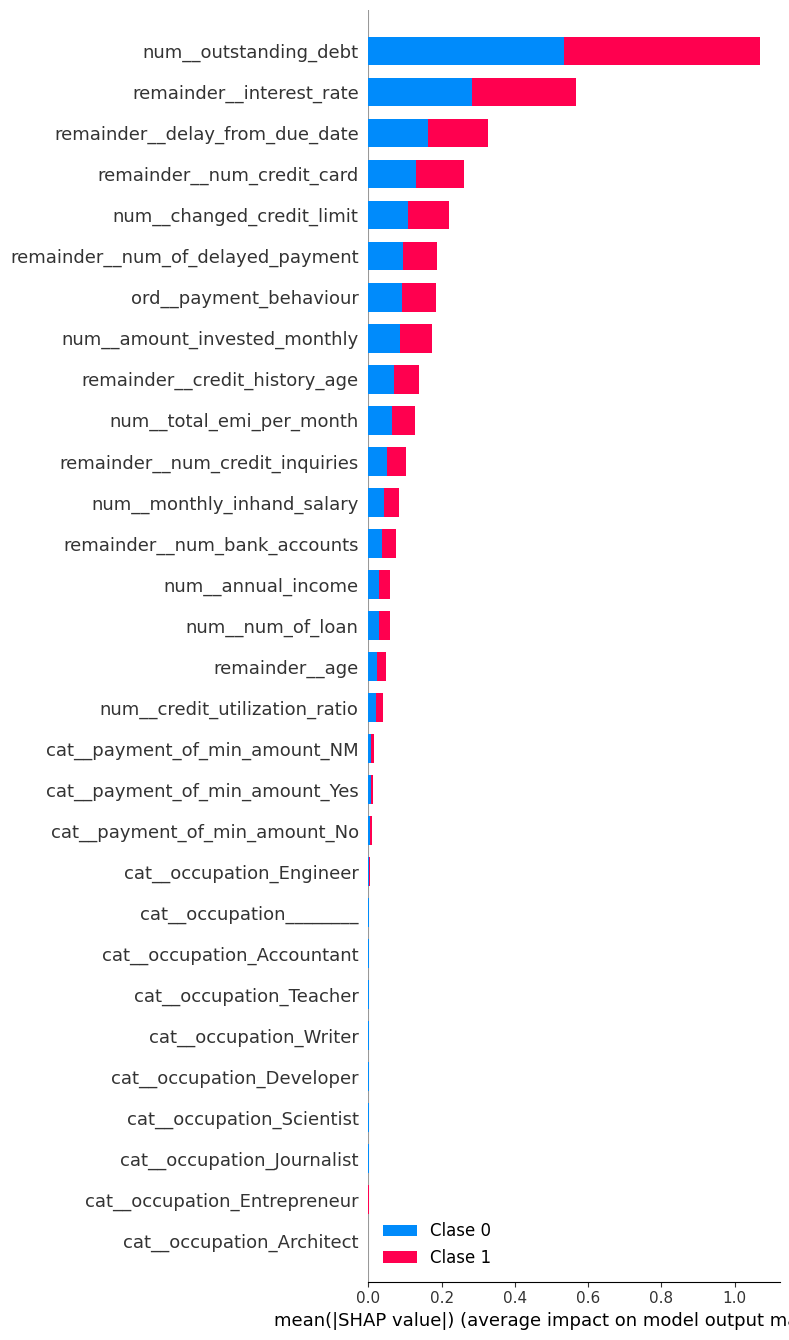

In [95]:
shap.summary_plot(shap_values_lgbm, new_X_train, plot_type="bar", max_display=30,class_names=["Clase 0", "Clase 1"])

Se puede apreciar que no todas las features son importantes segun este modelo, de hecho, se puede ver que la importancia de las variables es similar a la informacion mutua calculada anterioremente. En resumidas cuentas, se aprecia y comprueba que no todas las features son informativas o importantes para resolver el problema, y que las más importantes tienen cierta relacion más directa, como deudas, tasas de interes, atrasos de pago, etc. lo cual tiene relacion con el posible riesgo de impago que tengan, en comparacion con las menos importantes que se relacionan con las ocupaciones de las personas. Esto nos dice que la ocupacion no es un aspecto importante respecto a la morbosidad o riesgo que existe de que una persona no pague.

Por otro lado se puede apreciar cierto balance entre importancia de estas caracteristicas con cada clase respectiva, lo cual da cuenta de que estas sirven para poder diferenciar de manera equitativa estas mismas clases y que no discrimina una sobre otra (datos solapados).

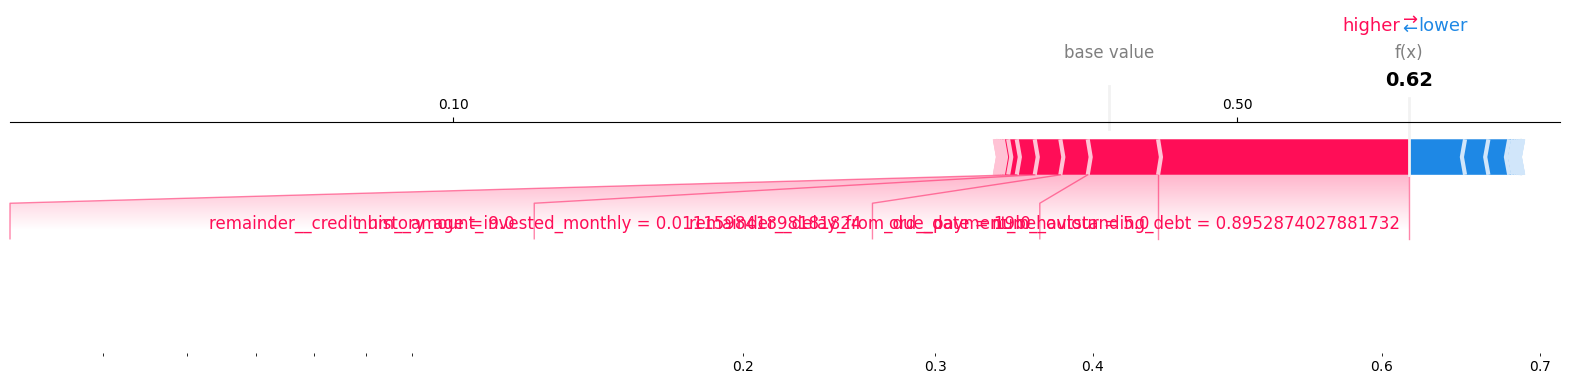

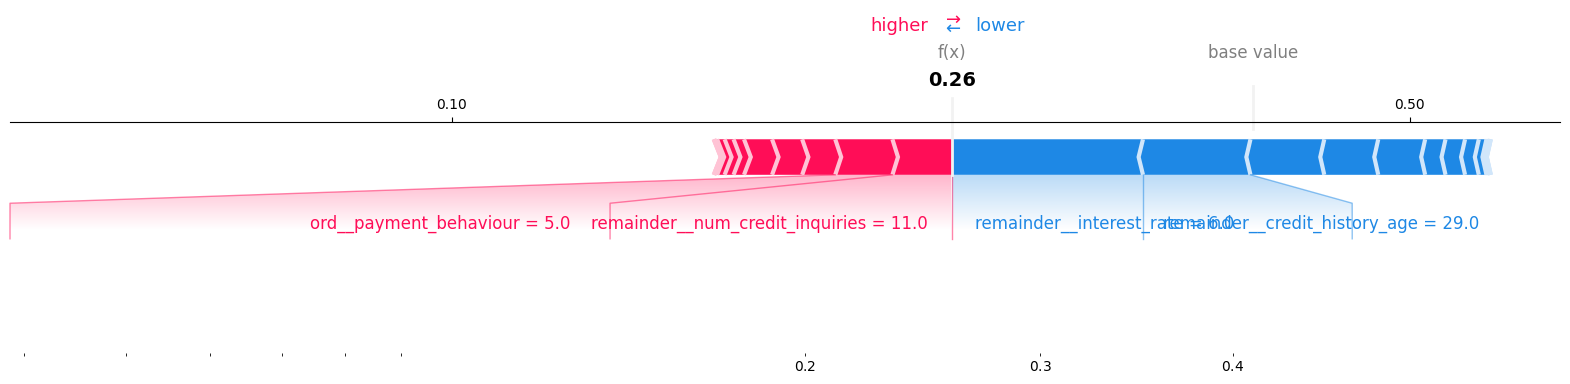

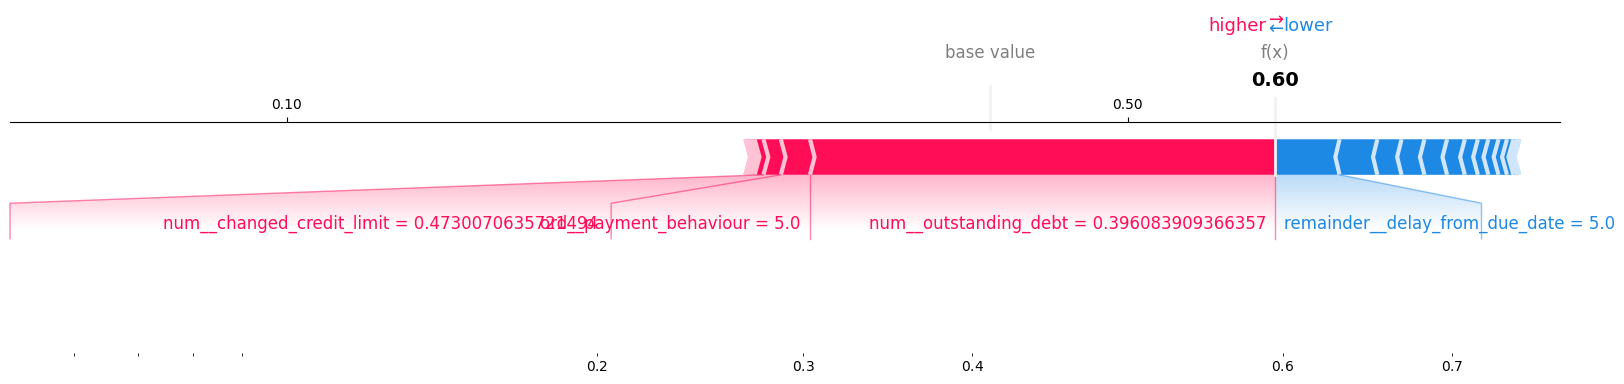

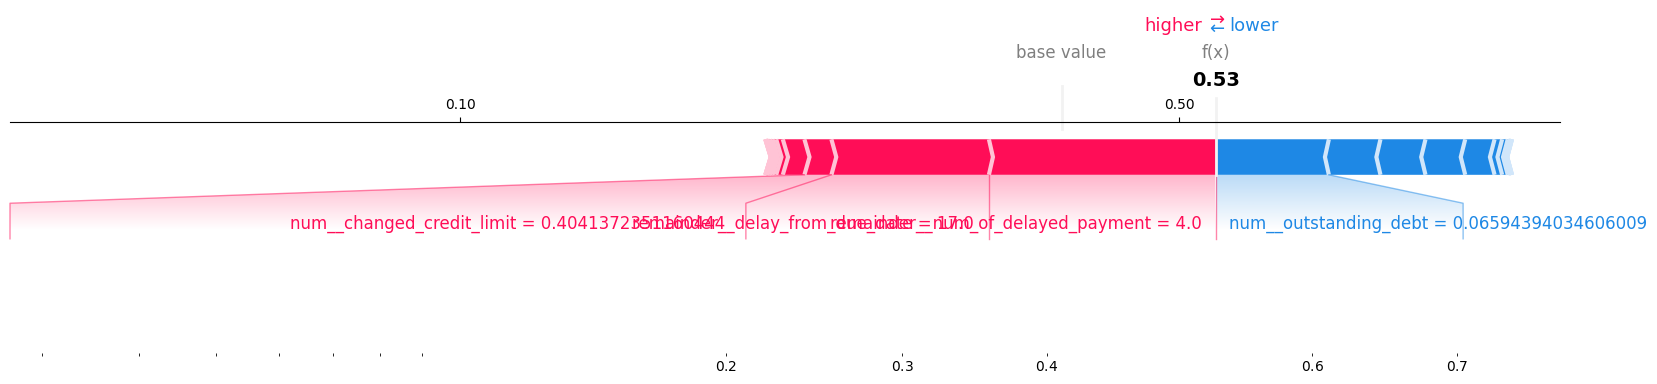

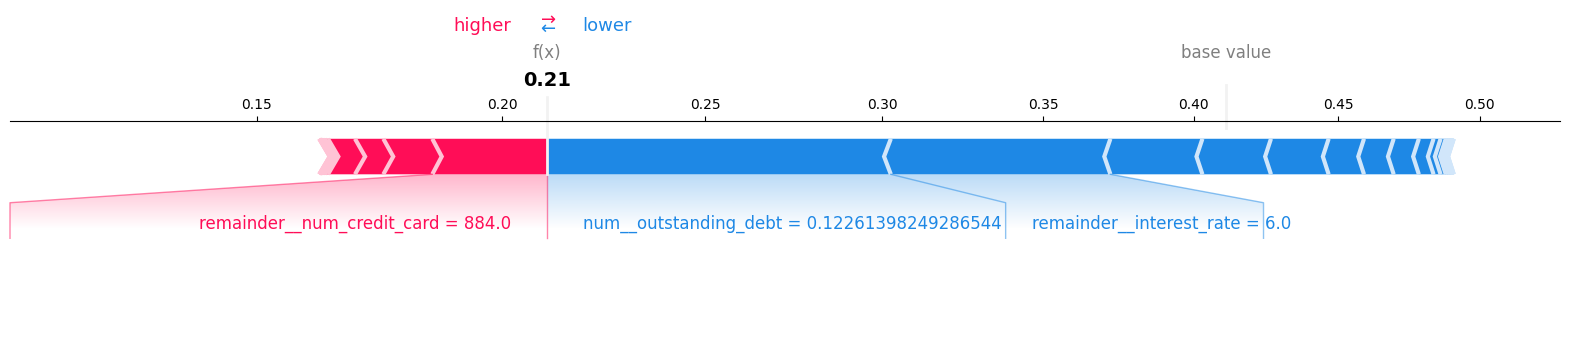

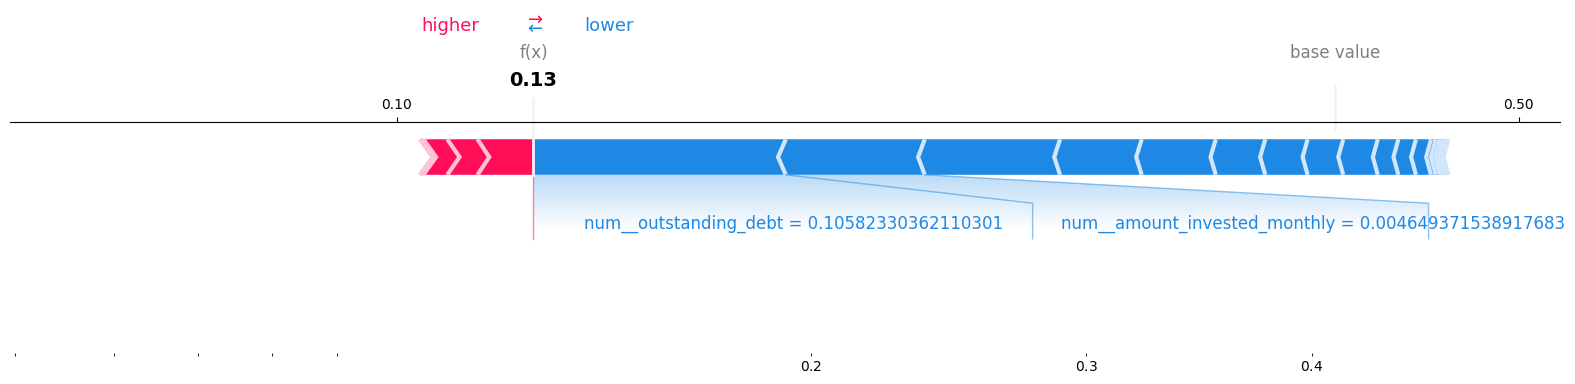

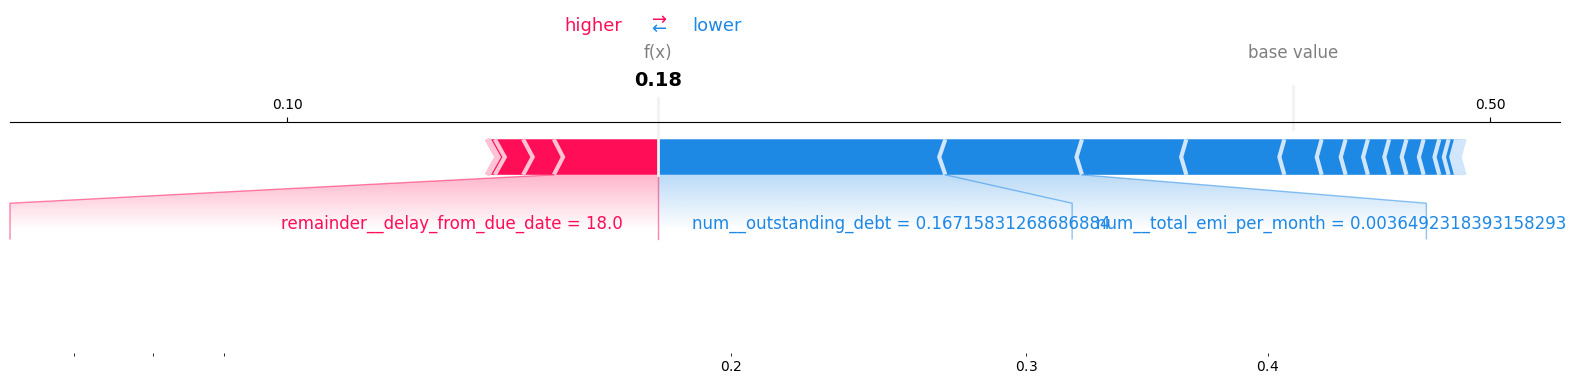

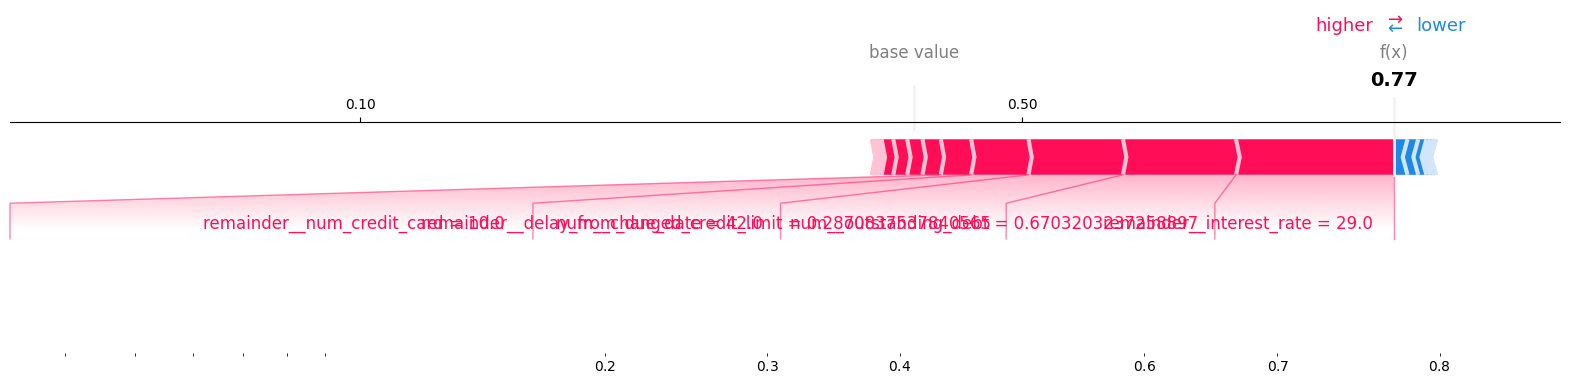

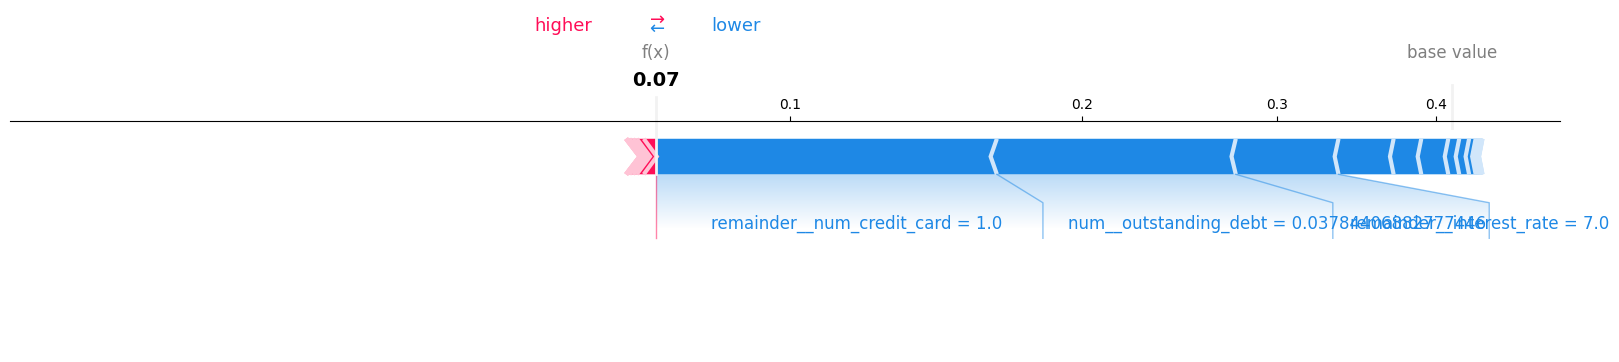

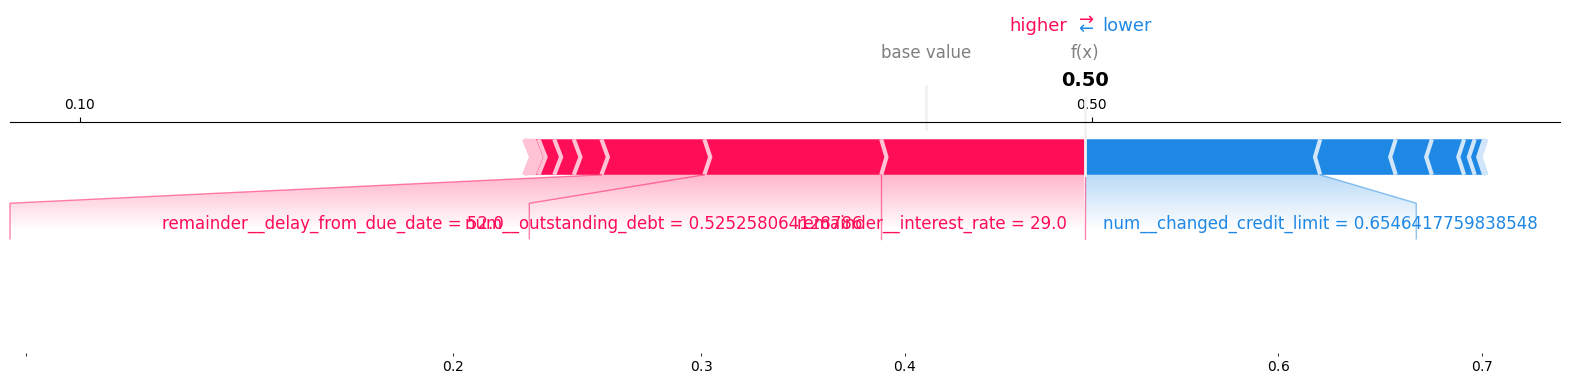

In [94]:
random_idx = np.random.randint(0, len(new_X_train), 10)
for idx in random_idx:
    force =shap.force_plot(explainer.expected_value[1], 
            shap_values_lgbm[1][idx], 
            new_X_train.iloc[idx],
            link="logit",
            matplotlib=True) 

En estos ejemplos se puede apreciar la importancia de las caracteristicas y de como estas influyen en la prediccion del modelo. En este caso se muestran respecto a la prediccion de la clase 0 (clase riesgosa). Por lo general, se puede ver que la caracteristica remainder_num_credit_card es una de las mas influyentes (en estos ejemplos), sin embargo, esta aporta tanto positiva como negativamente, lo cual depende de la clase a la que pertenece el ejemplo. Lo mismo con num_outstanding_debt.



Para ver la dependencia entre variables solo analizaremos las 7 más importantes.

In [112]:
best = ["num__outstanding_debt" , "remainder__interest_rate","remainder__delay_from_due_date", "remainder__num_credit_card", "num__changed_credit_limit", "remainder__num_of_delayed_payment", "ord__payment_behaviour"]

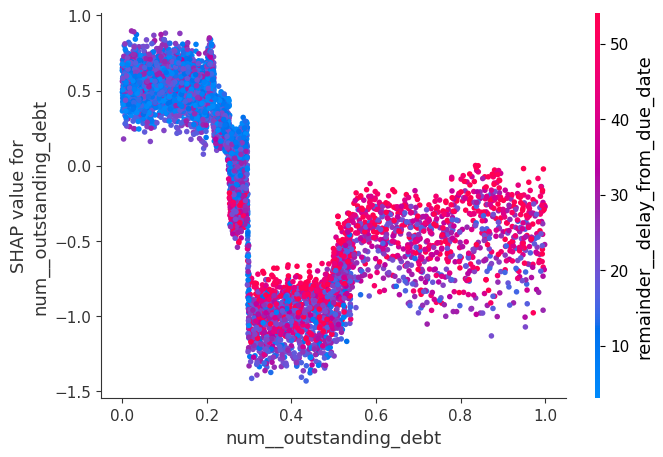

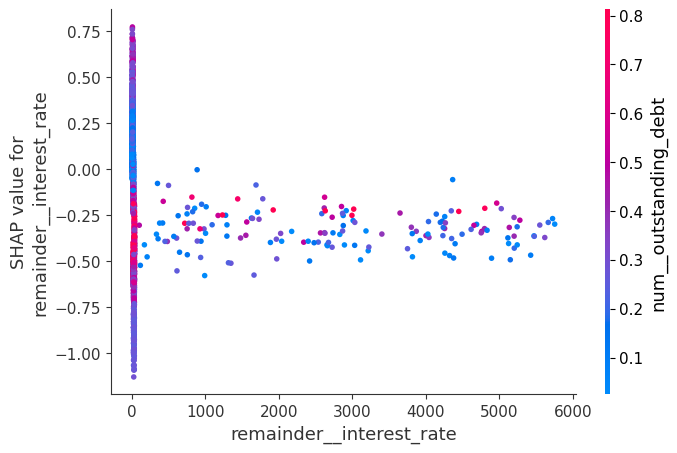

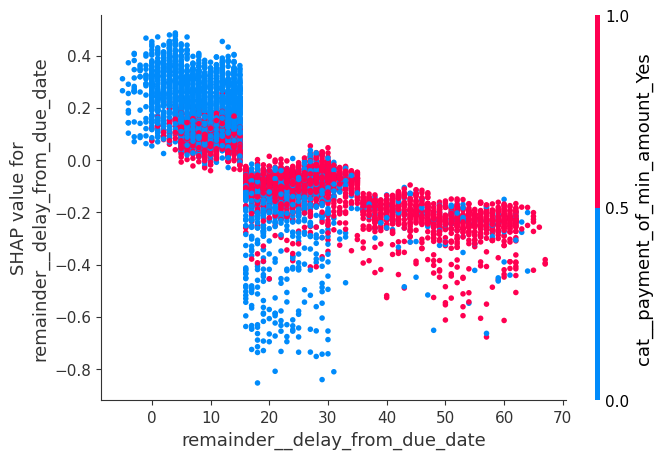

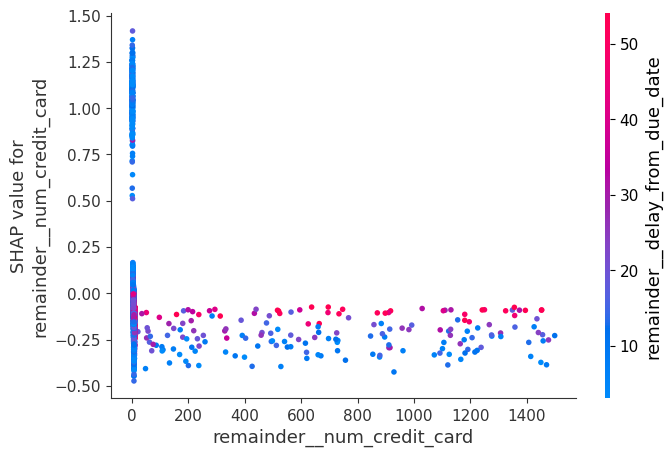

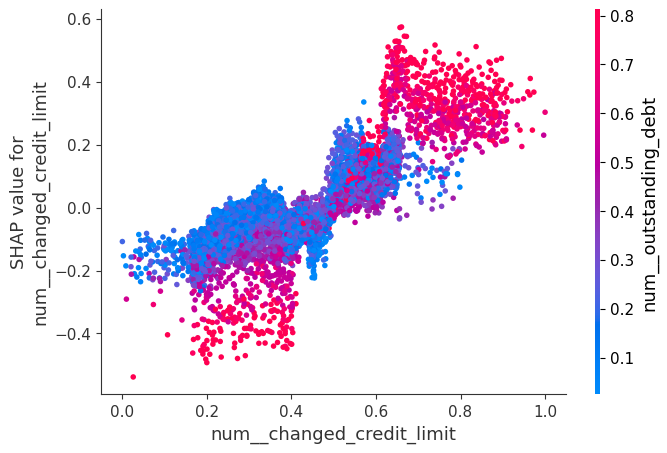

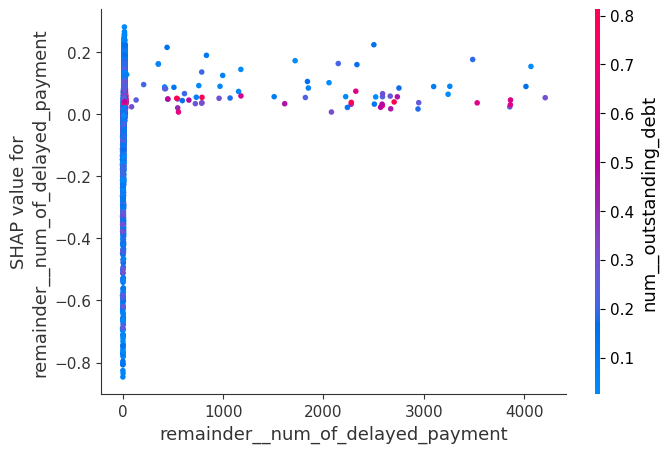

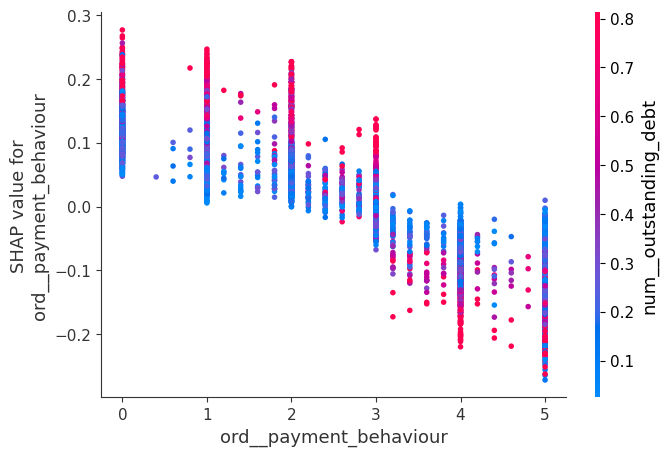

In [113]:
for column in best:
    shap.dependence_plot(column, shap_values_lgbm[0], new_X_train)


Por lo general, no hay relaciones tan claras, exceptuando delay_from_due_rate, en donde a valores mayores a 10, la variable aporta negativamente, y a valores menores aporta positivamente. Asi tambien, se puede apreciar que por lo general, las personas pagan el monto minimo despues de mucho tiempo, y para el modelo esto lo toma como un aporte principalmente negativo.

De las otras variables es mucho más complejo poder intepretar sus depedencias y su relacion con su aporte al modelo, debido a que no se aprecia un patron que tenga relacion al problema. Quizas hubiese sido más util haber calculado la correlacion entre las variables numericas y el coeficicente de Kramer para las categoricas y a partir de ellas, estudiar de manera mas detallada las que tengan mayor correlacion entre si.

### 7. Concluir [1.0 puntos]

Se pudo implementar clasificadores para que el banquero Guiturra pueda determinar el riesgo de prestamo de una persona, en donde se dio cuenta que son mejores que un clasificador aleatorio (Dummy), los cuales superaban el 70% de Macro Recall.

De los modelos se pudo comprobar que los mejores resultados fueron en aquellos que utilizaban arboles de decision, por lo que las hipotesis que se tenian en un comienzo fueron comprobadas, al menos para este problema. Asi tambien, se añadio el modelo Balanced Random Forest, el cual es una buena forma de poder lidiar con el desbalance entre clases presente en este problema, a diferencia de realizar oversampling y/o undersampling antes de usar los modelos, ya que tambien se tiene el problema de que no se sabe como poder realizar un balance optimo, debido a que se podrian estar eliminando o solapando datos representativos en las clases, asi tambien se podria estar ajustando demasiado el area de probabilidades de las clases, por lo que se podria perder generalidad frente a nuevos datos. En base a todo esto, no se puede saber si existe una forma adecuada de poder balancear las clases de tal forma de que un clasificador pueda diferenciar correctamente las clases sin perder datos representativos y/o generalidad, y probar varias combinaciones de balances especificos es altamente costoso computancionalmente y tambien de tiempo.

Por otro lado, se pudo utilizar Optuna como herramienta para encontrar los mejores hiperparametros de los 2 mejores modelos, en donde se da cuenta de lo buena que es esta herramienta la cual ahorra bastante tiempo de computo a diferencia de, por ejemplo, cross-validation, en donde se pudo mejorar aproximadamente un 1 a 3% más de Macro-Recall. Aun asi hay que considerar que los datos estan desbalanceados, por lo que la optimizacion de hiperparamtros podria estar sesgada a ciertas clases. Hubiese sido interesante probar con cross-validation y usar stratified k-fold y ver las diferencias con Optuna, y con ello, ver si vale la pena en funcion de los resultados y tiempo de busqueda.

A modo general, se obtuvieron buenas metricas, en donde tambien se pudo lograr que en ambas clases se obtuvieran tasas similares de predicciones correctas, a diferencia de por ejemplo, un clasificador el mismo Macro-Recall pero con una clasificacion perfecta para la clase mayoritaria pero una clasificacion aleatoria para la minoritaria, lo cual no es ideal tampoco, ya que se estaria subestimando la performance del clasificador, agregando de que le generaria más incertidumbre a Guiturra frente a la prediccion de datos sin etiquetar, ya que quizas todas las predicciones le salgan como la clase mayoritaria, lo cual tampoco tiene sentido. Esto fue gracias al modelo Balanced Random Forest, que realiza el balance de forma interna a la hora de entrenar, dando importancias similares a las clases que se tengan.

En este caso, el EDA sirvio principalmente para poder ver el balance de las clases y la forma de poder imputar los datos faltantes para no potenciar aun más el desbalance existente, por lo mismo se utilizó KNNImputer, donde se obtuvieron mejores resultados frente a eliminar completamente esos datos. Otro aporte de realizar el EDA, fue de poder ver las features categoricas existentes, ya que se pudo haber utilizado OneHotEncoder en todas las categorias, pero esto quizas no hubiese sido necesario si se utilizan modelos basados en arboles de decision, ya que generaria una base de datos sparse y, como algunos utilzan una muestra aleatoria de caracteristicas, es más problabe que salgan caracteristicas que no aportan informacion.

En base a esto ultimo, y a todo el trabajo, los resultados son buenos, pero aun asi estos podrian ser mejores, pero no utilizando otros modelos, o en una optimizacion mas detallada de los mismos, sino de otros metodos, como feature selection con los resultados de SHAP o de la informacion mutua que se utilizó, o incluso pre-procesar los datos de otra forma, como por ejemplo, convertir las columnas categorias a clases numericas y utilizar modelos que usen arboles de decision, que es lo que se dijo anteriormente.

Por ultimo, al tratarse de un problema de prediccion de riesgo, hubiese sido interesante ocupar aprendizaje no supervisado como por ejemplo K-means o Isolation Forest y contrastar con estos resultados.


### 8. Bonus: Implementación de Kedro y FastAPI [1.5 puntos]

**OPCIONAL**

En esta sección se les solicita utilizar las últimas tecnologías vistas en el curso para la productivización del proyecto de ciencia de datos, centrándose en la organización y gestión de los flujos de trabajo a través de componentes y pipelines, más el servicio del modelo a través del desarrollo de una API.

Para esto: 

1. Genere un proyecto de `Kedro` en donde separe por responsabilidades los nodos/componentes de su proyecto de ciencia de datos en módulos separados. [1.0 puntos]
2. Genere un servidor basado en `FastAPI` el cuál a través de un método post, reciba un batch de datos y genere predicciones para cada uno de ellos. [0.5 puntos]

Las implementaciones son libres. Es decir, usted decide qué componentes implementar, como usar el catálogo de datos y la parametrización del flujo. Sin embargo, evaluaremos buen uso de los framework, modularización y separación de responsabilidades.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>